In [9]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
pd.set_option('display.max_columns', None)

In [3]:
data_encoded = pickle.load( open( "data_encodings.p", "rb" ) )

In [ ]:
# Code nochmal einfügen, damit ich den neuesten Stand der Daten habe

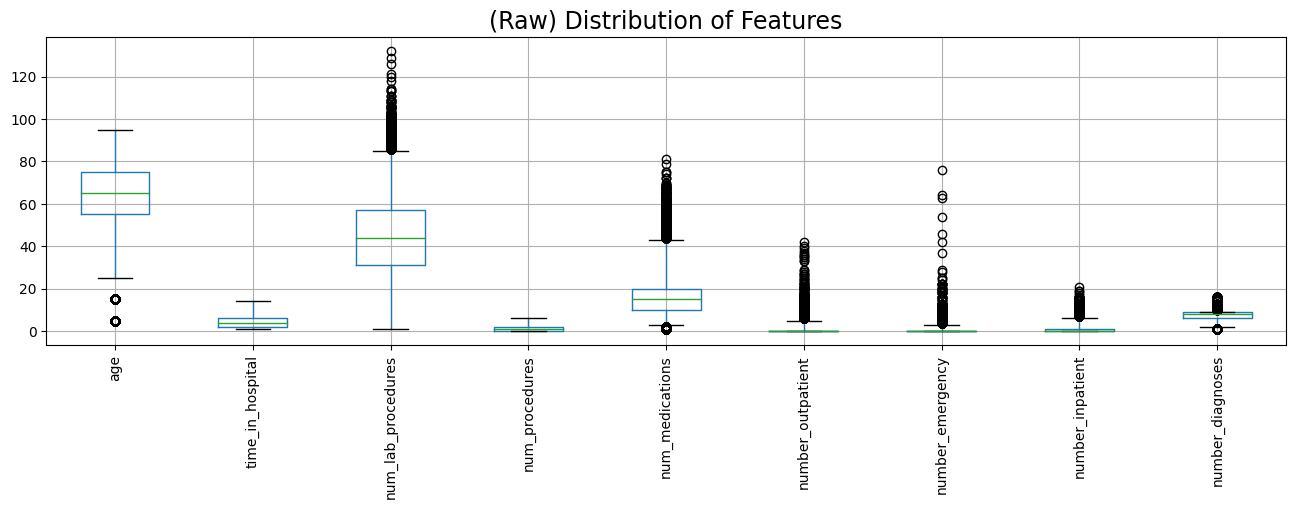

In [4]:
plt.figure(figsize=(16,4))
data_encoded.copy().drop('patient_nbr', axis=1).loc[:,'age':'number_diagnoses'].boxplot(whis=(1,99))
plt.title('(Raw) Distribution of Features', fontsize=17)
plt.xticks(rotation=90)
plt.show()

In [5]:
for key in data_encoded.keys():
    data_encoded[key] = data_encoded[key][(np.abs(stats.zscore(data_encoded[key])) < 3)]
data_encoded.head()


,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers
0,8222157.0,NaN,1.0,41.0,0,1.0,0.0,0.0,0.0,NaN,...,0.0,0,0,0,NaN,0.0,0.0,0,1,0.0
1,55629189.0,NaN,3.0,59.0,0,18.0,0.0,0.0,0.0,9.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0
2,86047875.0,25.0,2.0,11.0,5,13.0,2.0,0.0,1.0,6.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0
3,82442376.0,35.0,2.0,44.0,1,16.0,0.0,0.0,0.0,7.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0
4,42519267.0,45.0,1.0,51.0,0,8.0,0.0,0.0,0.0,5.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0


In [6]:
data_scaled = data_encoded.copy()
scaler = MinMaxScaler()
data_scaled[data_encoded.columns] = scaler.fit_transform(data_encoded)
data_scaled.head()

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers
0,0.048273,NaN,0.000000,0.396040,0.000000,0.000000,0.0,0.0,0.00,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0
1,0.326608,NaN,0.166667,0.574257,0.000000,0.435897,0.0,0.0,0.00,0.636364,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.505202,0.000000,0.083333,0.099010,0.833333,0.307692,0.5,0.0,0.25,0.363636,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.484033,0.142857,0.083333,0.425743,0.166667,0.384615,0.0,0.0,0.00,0.454545,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.249638,0.285714,0.000000,0.495050,0.000000,0.179487,0.0,0.0,0.00,0.272727,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = data_scaled
imp.fit_transform(X)

array([[0.04827299, 0.59161832, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.32660833, 0.59161832, 0.16666667, ..., 1.        , 0.        ,
        0.        ],
       [0.50520199, 0.        , 0.08333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.24123899, 0.71428571, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.18607853, 0.85714286, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.31274054, 0.71428571, 0.41666667, ..., 1.        , 0.        ,
        0.        ]])

In [17]:
data = X
data

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,medical_specialty_General Practice,medical_specialty_Internal Medicine,medical_specialty_Missing,medical_specialty_Others,medical_specialty_Surgery,admission_group_Elective,admission_group_Emergency,admission_group_Newborn,admission_group_Unavailable,discharge_disposition_id_grouped_AMA_StillCare,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers
0,0.048273,NaN,0.000000,0.396040,0.000000,0.000000,0.00,0.0,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0
1,0.326608,NaN,0.166667,0.574257,0.000000,0.435897,0.00,0.0,0.00,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.505202,0.000000,0.083333,0.099010,0.833333,0.307692,0.50,0.0,0.25,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.484033,0.142857,0.083333,0.425743,0.166667,0.384615,0.00,0.0,0.00,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.249638,0.285714,0.000000,0.495050,0.000000,0.179487,0.00,0.0

# Splitten in Test und Training

target: "readmitted"

In [33]:
y = data["readmitted"].values
features = data.drop(columns=["readmitted"])
X = features.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.cluster import MiniBatchKMeans as mbkm

In [31]:
n_clusters = 5
kmeans = mbkm(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
cluster_centers

ValueError: Input X contains NaN.
MiniBatchKMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [32]:
# dropping entries with nan (are there any left at the end?)
# überhaupt nicht sinnvoll. Was sollen wir hier Clustern? Was wollen wir überhaupt erkennen?
data_cleaned = data.dropna()
len(data_cleaned)

14329

In [35]:
y = data_cleaned["readmitted"].values
features = data_cleaned.drop(columns=["readmitted"])
X = features.values

In [45]:
X.shape[1]

107

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

11463

In [38]:
n_clusters = 5
kmeans = mbkm(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
cluster_labels

array([3, 4, 1, ..., 0, 2, 4], dtype=int32)